In [1]:
%run ./PPS_Expansion_Model.ipynb

In [2]:
# Distance points in cm (network coordinates)
s_distances = np.asarray([2700, 2200, 1500, 800, 300]) / 1000
s_distances_sec = np.linspace(s_distances[0], s_distances[-1], 15)
v = 30  # cm/s
a_distances = 100 - s_distances_sec * v  # distance points in cm (network coordinates)

ts = 0.4
simtime = 200

### Training parameters

In [3]:
stim_counts = 10
locav_x = 60

siga_x, sigv_x = 6.992e01, 2.889e00

HCWat, HCWvt, HCWav = cross_modal(at=0.05, sigat=2, vt=0.05, sigvt=2, av=0.05, sigav=2)
HCWt, HCWa, HCWv, HCBt, HCBa, HCBv = FwFb(
    Wt_0=6.5,
    Wa_0=6.5,
    Wv_0=6.5,
    Bt_0=2.5,
    Ba_0=2.5,
    Bv_0=2.5,
    k1=2.603e01,
    k2=7.795e02,
    lim=2.009e01,
    alpha=9.415e-01,
)

HCLt, HCLa, HCLv = Lw(
    Lex_t=0.15,
    Lin_t=0.05,
    sigmaex_t=1,
    sigmain_t=4,
    Lex_a=0.15,
    Lin_a=0.05,
    sigmaex_a=20,
    sigmain_a=80,
    Lex_v=0.15,
    Lin_v=0.05,
    sigmaex_v=1,
    sigmain_v=4,
)

## HC Training

In [4]:
rho_0 = 6.137e-02
k_a = 5e-05
k_v = 5e-05
theta_tr = 0.05

HCWa_tr, HCWv_tr, zm, zv, za, zt = FWTraining(
    n_steps=stim_counts,
    T=simtime,
    ts=ts,
    Lt=HCLt,
    La=HCLa,
    Lv=HCLv,
    Wt=HCWt,
    Wa=HCWa,
    Wv=HCWv,
    Bt=HCBt,
    Ba=HCBa,
    Bv=HCBv,
    Wat=HCWat,
    Wvt=HCWvt,
    Wav=HCWav,
    FWpr=0,
    rho_0=rho_0,
    Wmax_a=6.5,
    Wmax_v=6.5,
    k_a=k_a,
    k_v=k_v,
    theta=theta_tr,
    locav_x=locav_x,
    siga_x=siga_x,
    sigv_x=sigv_x,
)

Text(0.5, 1.0, 'HC')

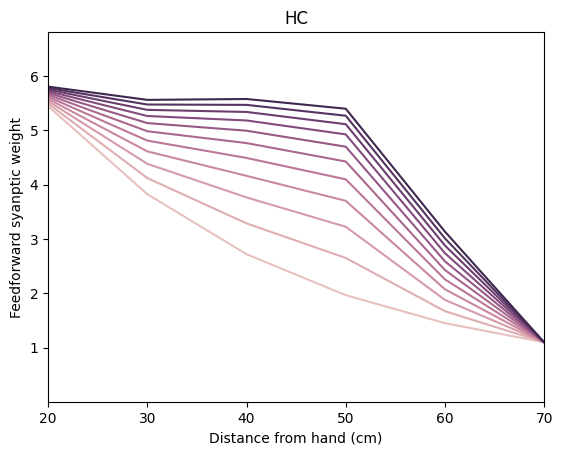

In [5]:
import seaborn as sns

hc_training_steps = np.column_stack((HCWa_tr[:, 1, :, 0], HCWa_tr[:, 1, -1, -1]))

sns.lineplot(
    hc_training_steps, palette="ch:dark=.20,light=.80", dashes=False, legend=False
)
plt.xlim(2, 7)
plt.xticks(ticks=[2, 3, 4, 5, 6, 7], labels=[20, 30, 40, 50, 60, 70])
plt.xlabel("Distance from hand (cm)")
plt.ylabel("Feedforward syanptic weight")
plt.title("HC")

## SCZ Training

In [6]:
Lex, Pr = 7.887e-01, 4.773e-01
SCZLt, SCZLa, SCZLv = Lw(
    Lex_t=Lex,
    Lin_t=0.05,
    sigmaex_t=1,
    sigmain_t=4,
    Lex_a=Lex,
    Lin_a=0.05,
    sigmaex_a=20,
    sigmain_a=80,
    Lex_v=Lex,
    Lin_v=0.05,
    sigmaex_v=1,
    sigmain_v=4,
)

In [7]:
rho_0 = 6.137e-02
k_a = 5e-05
k_v = 5e-05
theta_tr = 0.05

SCZWa_tr, SCZWv_tr, _, _, _, _ = FWTraining(
    n_steps=stim_counts,
    T=simtime,
    ts=ts,
    Lt=SCZLt,
    La=SCZLa,
    Lv=SCZLv,
    Wt=HCWt,
    Wa=HCWa,
    Wv=HCWv,
    Bt=HCBt,
    Ba=HCBa,
    Bv=HCBv,
    Wat=HCWat,
    Wvt=HCWvt,
    Wav=HCWav,
    FWpr=Pr,
    rho_0=rho_0,
    Wmax_a=6.5,
    Wmax_v=6.5,
    k_a=k_a,
    k_v=k_v,
    theta=theta_tr,
    locav_x=locav_x,
    siga_x=siga_x,
    sigv_x=sigv_x,
)

Text(0.5, 1.0, 'SCZ - $L^{s}_{ex}$ - $\\rho_{{W}^{m}}$')

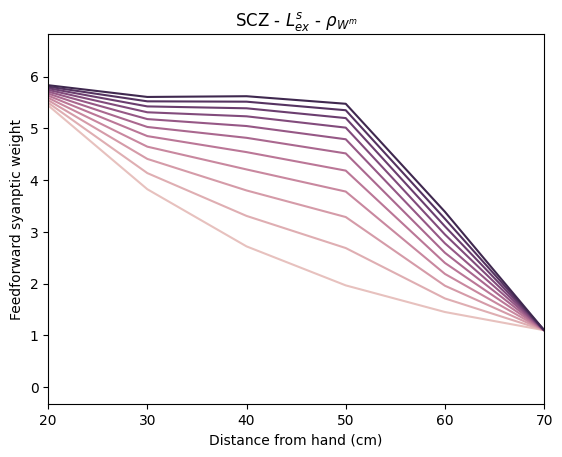

In [8]:
scz_training_steps = np.column_stack((SCZWa_tr[:, 1, :, 0], SCZWa_tr[:, 1, -1, -1]))

sns.lineplot(
    scz_training_steps, palette="ch:dark=.20,light=.80", dashes=False, legend=False
)
plt.xlim(2, 7)
plt.xticks(ticks=[2, 3, 4, 5, 6, 7], labels=[20, 30, 40, 50, 60, 70])
plt.xlabel("Distance from hand (cm)")
plt.ylabel("Feedforward syanptic weight")
plt.title("SCZ - " + r"$L^{s}_{ex}$ - " + r"$\rho_{{W}^{m}}$")

## SCZ Training - Reduced learning rate

In [9]:
rho_0 = 1.435e-02
k_a = 5e-05
k_v = 5e-05
theta_tr = 0.05

SCZWa_tr_rho, SCZWv_tr_rho, _, _, _, _ = FWTraining(
    n_steps=stim_counts,
    T=simtime,
    ts=ts,
    Lt=SCZLt,
    La=SCZLa,
    Lv=SCZLv,
    Wt=HCWt,
    Wa=HCWa,
    Wv=HCWv,
    Bt=HCBt,
    Ba=HCBa,
    Bv=HCBv,
    Wat=HCWat,
    Wvt=HCWvt,
    Wav=HCWav,
    FWpr=Pr,
    rho_0=rho_0,
    Wmax_a=6.5,
    Wmax_v=6.5,
    k_a=k_a,
    k_v=k_v,
    theta=theta_tr,
    locav_x=locav_x,
    siga_x=siga_x,
    sigv_x=sigv_x,
)

Text(0.5, 1.0, 'SCZ - $L^{s}_{ex}$ - $\\rho_{{W}^{m}}$ - $\\rho^{s}_{0}$')

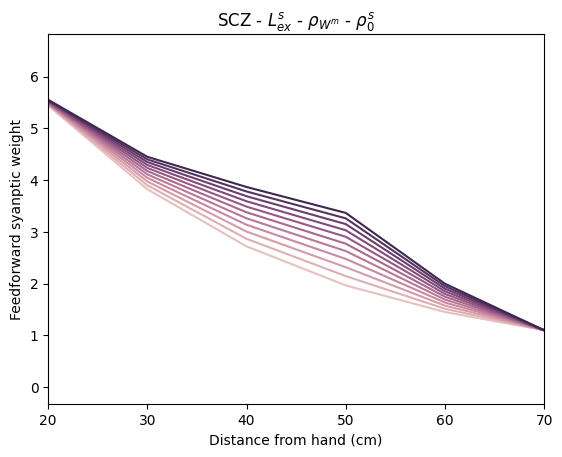

In [ ]:
scz_training_steps_rho = np.column_stack(
    (SCZWa_tr_rho[:, 1, :, 0], SCZWa_tr_rho[:, 1, -1, -1])
)

sns.lineplot(
    scz_training_steps_rho, palette="ch:dark=.20,light=.80", dashes=False, legend=False
)
plt.xlim(2, 7)
plt.xticks(ticks=[2, 3, 4, 5, 6, 7], labels=[20, 30, 40, 50, 60, 70])
plt.xlabel("Distance from hand (cm)")
plt.ylabel("Feedforward syanptic weight")
plt.title("SCZ - " + r"$L^{s}_{ex}$ - " + r"$\rho_{{W}^{m}}$ - " + r"$\rho^{s}_{0}$")

## SCZ Training - Forgetting rate

In [11]:
rho_0 = 6.137e-02
k_a = 1.247e-03
k_v = 1.247e-03
theta_tr = 0.05

SCZWa_tr_kappa, SCZWv_tr_kappa, _, _, _, _ = FWTraining(
    n_steps=stim_counts,
    T=simtime,
    ts=ts,
    Lt=SCZLt,
    La=SCZLa,
    Lv=SCZLv,
    Wt=HCWt,
    Wa=HCWa,
    Wv=HCWv,
    Bt=HCBt,
    Ba=HCBa,
    Bv=HCBv,
    Wat=HCWat,
    Wvt=HCWvt,
    Wav=HCWav,
    FWpr=Pr,
    rho_0=rho_0,
    Wmax_a=6.5,
    Wmax_v=6.5,
    k_a=k_a,
    k_v=k_v,
    theta=theta_tr,
    locav_x=locav_x,
    siga_x=siga_x,
    sigv_x=sigv_x,
)

Text(0.5, 1.0, 'SCZ - $L^{s}_{ex}$ - $\\rho_{{W}^{sm}}$ - $\\kappa^{s}$')

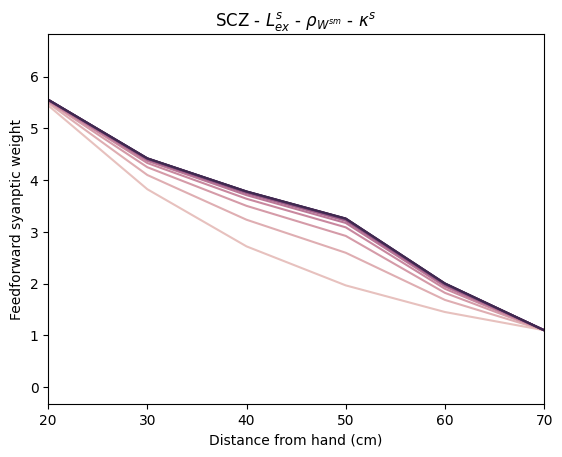

In [ ]:
scz_training_steps_kappa = np.column_stack(
    (SCZWa_tr_kappa[:, 1, :, 0], SCZWa_tr_kappa[:, 1, -1, -1])
)

sns.lineplot(
    scz_training_steps_kappa,
    palette="ch:dark=.20,light=.80",
    dashes=False,
    legend=False,
)
plt.xlim(2, 7)
plt.xticks(ticks=[2, 3, 4, 5, 6, 7], labels=[20, 30, 40, 50, 60, 70])
plt.xlabel("Distance from hand (cm)")
plt.ylabel("Feedforward syanptic weight")
plt.title("SCZ - " + r"$L^{s}_{ex}$ - " + r"$\rho_{{W}^{sm}}$ - " + r"$\kappa^{s}$")

## SCZ Training - Plasticity threshold

In [13]:
rho_0 = 6.137e-02
k_a = 5e-05
k_v = 5e-05
theta_tr = 8.019e-01

SCZWa_tr_theta, SCZWv_tr_theta, _, _, _, _ = FWTraining(
    n_steps=stim_counts,
    T=simtime,
    ts=ts,
    Lt=SCZLt,
    La=SCZLa,
    Lv=SCZLv,
    Wt=HCWt,
    Wa=HCWa,
    Wv=HCWv,
    Bt=HCBt,
    Ba=HCBa,
    Bv=HCBv,
    Wat=HCWat,
    Wvt=HCWvt,
    Wav=HCWav,
    FWpr=Pr,
    rho_0=rho_0,
    Wmax_a=6.5,
    Wmax_v=6.5,
    k_a=k_a,
    k_v=k_v,
    theta=theta_tr,
    locav_x=locav_x,
    siga_x=siga_x,
    sigv_x=sigv_x,
)

Text(0.5, 1.0, 'SCZ - $L^{s}_{ex}$ - $\\rho_{{W}^{m}}$ - $\\theta$')

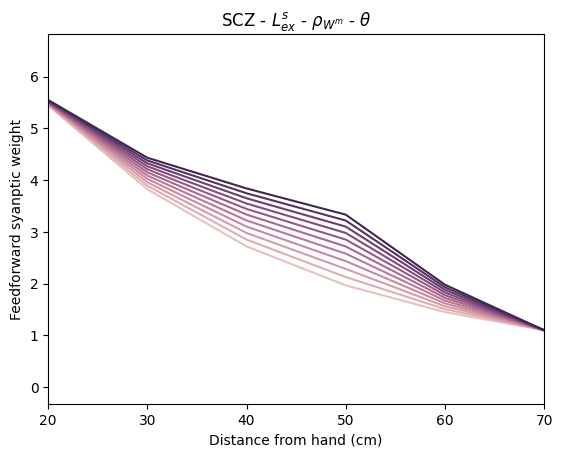

In [ ]:
scz_training_steps_theta = np.column_stack(
    (SCZWa_tr_theta[:, 1, :, 0], SCZWa_tr_theta[:, 1, -1, -1])
)

sns.lineplot(
    scz_training_steps_theta,
    palette="ch:dark=.20,light=.80",
    dashes=False,
    legend=False,
)
plt.xlim(2, 7)
plt.xticks(ticks=[2, 3, 4, 5, 6, 7], labels=[20, 30, 40, 50, 60, 70])
plt.xlabel("Distance from hand (cm)")
plt.ylabel("Feedforward syanptic weight")
plt.title("SCZ - " + r"$L^{s}_{ex}$ - " + r"$\rho_{{W}^{m}}$ - " + r"$\theta$")

## Figure 5

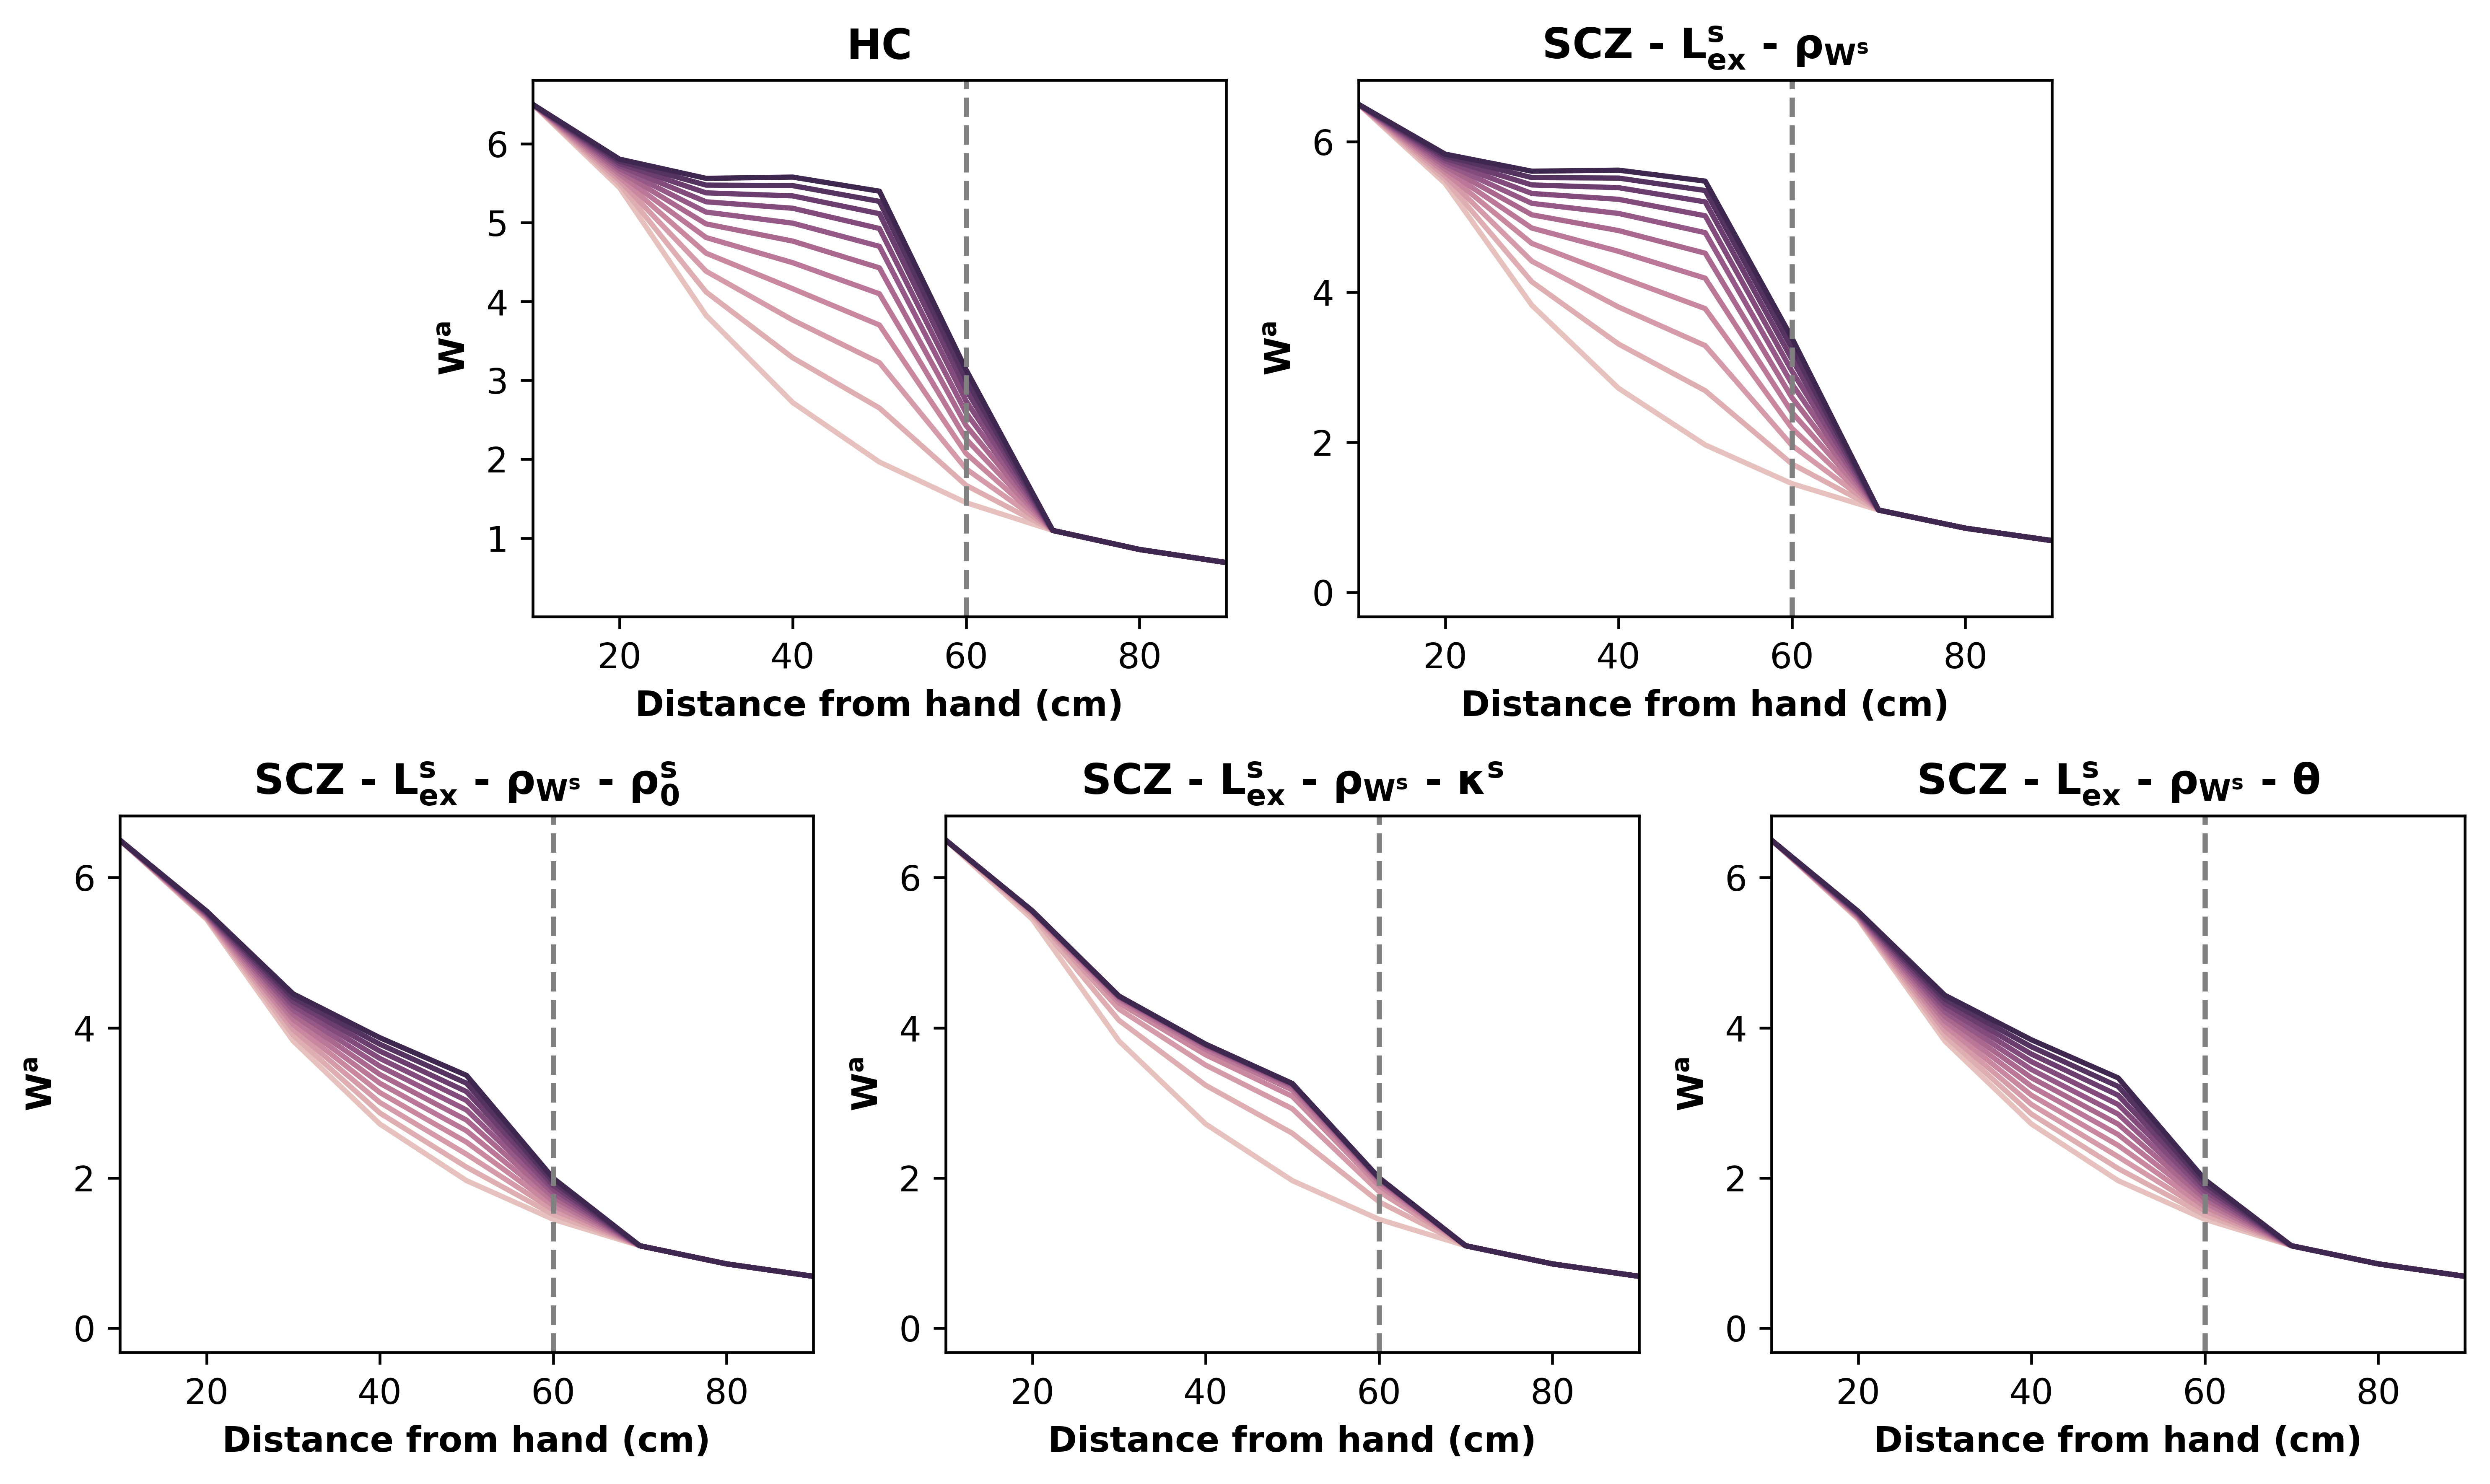

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure
fig = plt.figure(figsize=(10, 6), dpi=600)

# 1. Create the 2-row, 6-column GridSpec
gs = fig.add_gridspec(2, 6)

# 2. Add subplots for the top row (centered)
# We use columns 1-2 and 3-4, leaving 0 and 5 empty
ax1 = fig.add_subplot(gs[0, 1:3])
sns.lineplot(
    hc_training_steps,
    palette="ch:dark=.20,light=.80",
    dashes=False,
    legend=False,
    ax=ax1,
)
ax1.set_title("HC", fontweight="bold")

ax2 = fig.add_subplot(gs[0, 3:5])
sns.lineplot(
    scz_training_steps,
    palette="ch:dark=.20,light=.80",
    dashes=False,
    legend=False,
    ax=ax2,
)
ax2.set_title(
    "SCZ - " + r"$\mathbf{L^{s}_{ex}}$ - " + r"$\mathbf{\rho_{{W}^{s}}}$",
    fontweight="bold",
)

# 3. Add subplots for the bottom row
# These fill all 6 columns
ax3 = fig.add_subplot(gs[1, 0:2])
sns.lineplot(
    scz_training_steps_rho,
    palette="ch:dark=.20,light=.80",
    dashes=False,
    legend=False,
    ax=ax3,
)
ax3.set_title(
    "SCZ - "
    + r"$\mathbf{L^{s}_{ex}}$ - "
    + r"$\mathbf{\rho_{{W}^{s}}}$ - "
    + r"$\mathbf{\rho^{s}_{0}}$",
    fontweight="bold",
)

ax4 = fig.add_subplot(gs[1, 2:4])
sns.lineplot(
    scz_training_steps_kappa,
    palette="ch:dark=.20,light=.80",
    dashes=False,
    legend=False,
    ax=ax4,
)
ax4.set_title(
    "SCZ - "
    + r"$\mathbf{L^{s}_{ex}}$ - "
    + r"$\mathbf{\rho_{{W}^{s}}}$ - "
    + r"$\mathbf{\kappa^{s}}$",
    fontweight="bold",
)

ax5 = fig.add_subplot(gs[1, 4:6])
sns.lineplot(
    scz_training_steps_theta,
    palette="ch:dark=.20,light=.80",
    dashes=False,
    legend=False,
    ax=ax5,
)
ax5.set_title(
    "SCZ - "
    + r"$\mathbf{L^{s}_{ex}}$ - "
    + r"$\mathbf{\rho_{{W}^{s}}}$ - "
    + r"$\mathbf{\theta}$",
    fontweight="bold",
)

for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.set_xlim(1, 9)
    ax.set_xticks(ticks=[2, 4, 6, 8], labels=[20, 40, 60, 80])
    ax.set_xlabel("Distance from hand (cm)", fontweight="bold")
    ax.set_ylabel(r"$\mathbf{W^{a}}$", fontweight="bold")
    ax.axvline(x=locav_x * 0.1, color="gray", linestyle="--")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

fig.savefig("drafts/FIG4.eps", bbox_inches="tight", format="eps")